# Logistic regression 

How do you create a logistic regression model using Scikit-Learn? The first thing you need to know is that despite the name logistic regression containing the word regression, logistic regression is a model used for classification. Classification models can be used for tasks like classifying flower species or image recognition. All of this of course depends on the availability and quality of your data. Logistic Regression has some advantages including

* Model training and predictions are relatively fast
* No tuning is usually needed for logistic regression unless you want to regularize your model. 
* Finally, it can perform well with a small number of observations. 

In this video, I'll share with you how you can create a logistic regession model for binary classification.

## Import Libraries

In [49]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

## Load the Dataset
 The code below loads a modified version of the iris dataset which has two classes. A 1 is a virginica flower and a 0 is versicolor flower. 

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/svkarthik86/Meachine_Learning/main/data/modifiedIris2Classes.csv')

In [51]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


In [52]:
df.shape

(100, 5)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


## Splitting Data into Training and Test Sets

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df[['petal length (cm)']], df['target'], random_state=0)

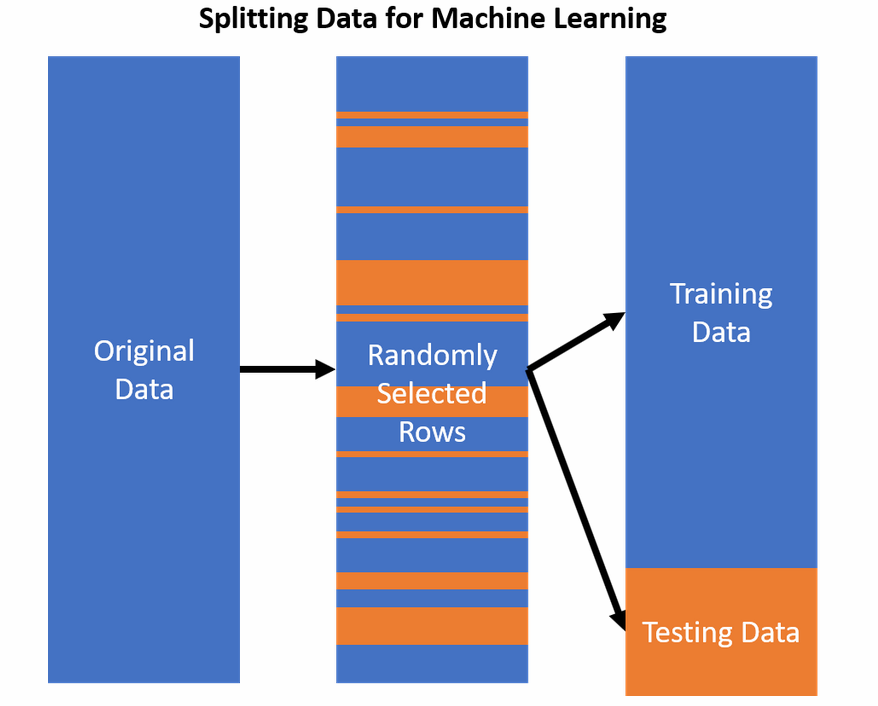

## Standardize the Data
Logistic Regression is effected by scale so you need to scale the features in the data before using Logistic Regresison. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
X_train

array([[-2.29778941],
       [-0.24187257],
       [ 0.24187257],
       [ 0.84655399],
       [-0.12093628],
       [ 0.24187257],
       [ 1.45123542],
       [ 0.84655399],
       [ 2.4187257 ],
       [ 0.24187257],
       [ 0.12093628],
       [-0.48374514],
       [-0.48374514],
       [ 0.12093628],
       [ 0.96749028],
       [-0.48374514],
       [ 0.48374514],
       [-1.08842656],
       [-0.36280885],
       [-0.36280885],
       [-0.60468142],
       [-0.96749028],
       [-0.60468142],
       [-0.96749028],
       [-0.48374514],
       [ 0.24187257],
       [ 1.45123542],
       [-0.24187257],
       [-0.48374514],
       [-0.48374514],
       [ 1.33029913],
       [-0.84655399],
       [-0.48374514],
       [-0.24187257],
       [ 1.20936285],
       [-1.69310799],
       [-1.45123542],
       [ 0.72561771],
       [ 1.69310799],
       [ 1.08842656],
       [ 1.45123542],
       [-1.20936285],
       [ 0.84655399],
       [-1.5721717 ],
       [ 0.60468142],
       [-1

<AxesSubplot:ylabel='Density'>

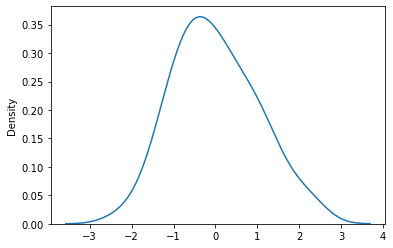

In [59]:
sns.kdeplot(x=np.ravel(X_train))


## Logistic Regression

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [13]:
# This was already imported earlier in the notebook so commenting out
from sklearn.linear_model import LogisticRegression

<b>Step 2:</b> Make an instance of the Model

This is a place where we can tune the hyperparameters of a model. Typically this is where you tune C is related to regularization

In [14]:
model= LogisticRegression()

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features sepal width, sepal height etc) and y (labels-which species of iris)

In [60]:
model.fit(X_train, y_train) # training

LogisticRegression()

# Attributes of Logistic Regression Model

In [61]:
model.classes_ #A list of class labels known to the classifier

array([0, 1], dtype=int64)

In [17]:
model.coef_  #Coefficient of the features in the decision function

array([[3.17034678]])

In [18]:
model.intercept_ #Intercept (a.k.a. bias) added to the decision function.

array([0.27449896])

In [62]:
model.n_features_in_ #Number of features seen during fit.

1

In [63]:
model.n_iter_ #Actual number of iterations for all classes

array([9])

<b>Step 4:</b> Predict the labels of new data (new flowers)

Logistic regression also allows you to see prediction probabilities as well as  a prediction. This is not like other algorithms like decision trees for classification which only give you a prediction not a probability. 

In [65]:
# One observation's petal length after standardization
X_test[0].reshape(1,-1)

array([[-0.12093628]])

In [66]:
model.predict([[-0.12093628]])

array([0], dtype=int64)

In [71]:
model.predict_proba([[-0.12093628]])

array([[0.52720087, 0.47279913]])

In [68]:
print('prediction', model.predict(X_test[0].reshape(1,-1))[0])
print('probability', model.predict_proba(X_test[0].reshape(1,-1)))

prediction 0
probability [[0.52720087 0.47279913]]


In [69]:
X_test

array([[-0.12093628],
       [ 0.84655399],
       [ 0.        ],
       [ 2.05591684],
       [ 1.33029913],
       [ 1.20936285],
       [-0.48374514],
       [ 0.        ],
       [ 1.08842656],
       [ 0.36280885],
       [ 0.84655399],
       [ 0.24187257],
       [ 0.84655399],
       [-0.24187257],
       [-1.93498056],
       [-1.33029913],
       [ 0.        ],
       [-0.72561771],
       [ 0.24187257],
       [-0.36280885],
       [-1.93498056],
       [ 0.72561771],
       [-1.08842656],
       [ 0.        ],
       [-0.84655399]])

In [29]:
y_test

26    0
86    1
2     0
55    1
75    1
93    1
16    0
73    1
54    1
95    1
53    1
92    1
78    1
13    0
7     0
30    0
22    0
24    0
33    0
8     0
43    0
62    1
3     0
71    1
45    0
Name: target, dtype: int64

If this is unclear, let's visualize how logistic regression makes predictions by looking at our test data!

In [30]:
example_df = pd.DataFrame()
example_df.loc[:, 'petal length (cm)'] = X_test.reshape(-1)
example_df.loc[:, 'target'] = y_test.values
example_df['logistic_preds'] = pd.DataFrame(model.predict_proba(X_test))[1]

In [72]:
example_df

,petal length (cm),target,logistic_preds
0,-0.120936,0,0.472799
1,0.846554,1,0.950658
2,0.000000,0,0.568197
3,2.055917,1,0.998879
4,1.330299,1,0.988926
5,1.209363,1,0.983835
6,-0.483745,0,0.221122
7,0.000000,1,0.568197
8,1.088427,1,0.976459
9,0.362809,1,0.806079


<AxesSubplot:xlabel='petal length (cm)', ylabel='logistic_preds'>

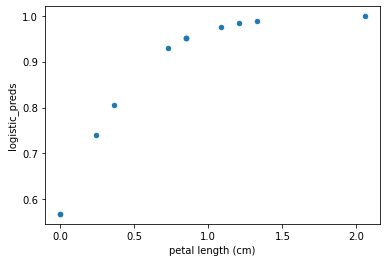

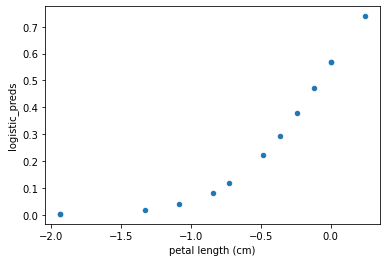

In [80]:
example_df[example_df['target'] == 1].plot(kind="scatter",x="petal length (cm)",y="logistic_preds")
example_df[example_df['target'] == 0].plot(kind="scatter",x="petal length (cm)",y="logistic_preds")

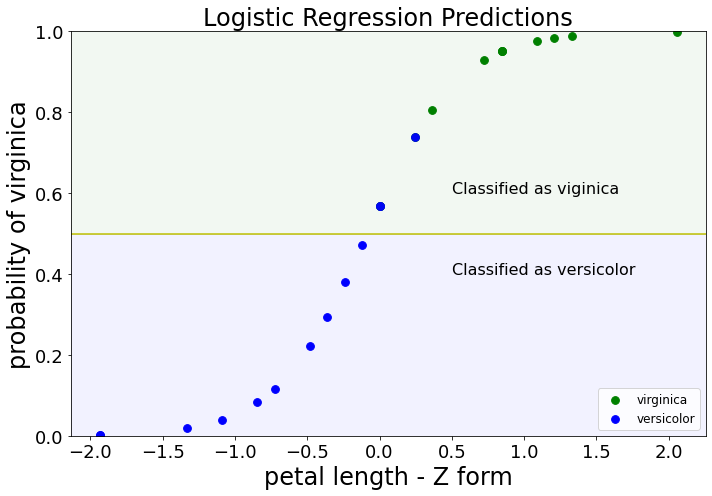

In [74]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

virginicaFilter = example_df['target'] == 1
versicolorFilter = example_df['target'] == 0

ax.scatter(example_df.loc[virginicaFilter, 'petal length (cm)'].values,
            example_df.loc[virginicaFilter, 'logistic_preds'].values,
           color = 'g',
           s = 60,
           label = 'virginica')


ax.scatter(example_df.loc[versicolorFilter, 'petal length (cm)'].values,
            example_df.loc[versicolorFilter, 'logistic_preds'].values,
           color = 'b',
           s = 60,
           label = 'versicolor')

ax.axhline(y = .5, c = 'y')

ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')
ax.text(0.5, .6, 'Classified as viginica', fontsize = 16)
ax.text(0.5, .4, 'Classified as versicolor', fontsize = 16)

ax.set_ylim(0,1)
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)
ax.tick_params(labelsize = 18)
ax.set_xlabel('petal length - Z form', fontsize = 24)
ax.set_ylabel('probability of virginica', fontsize = 24)
ax.set_title('Logistic Regression Predictions', fontsize = 24)
fig.tight_layout()


## Measuring Model Performance

While there are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), let's keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on new data (test set)

Accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

I) Confusion Matrix below is used to find the amount of values which are predicted correctly & wrongly.
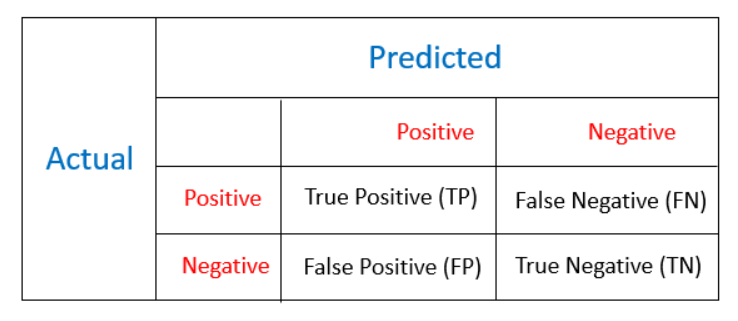
Here FP is called as Type I error and FN are called as Type II error. Where both the Type I and II errors are the values which are predicted wrongly. Similarly TP and TN are the values which are predicted correctly

IV) ROC Curve: “Receiver Operating Characteristic Curve” is the score which lies between 0 to 1. 0 stands for Bad and 1 stands for Good. 0.5 is better. If ROC score is 0.78 then it means 78% of predicted values are correct and rest 22% are predicted wrongly.

In [81]:
score = model.score(X_test, y_test) #Return the mean accuracy on the given test data and labels
print(score)

0.88


In [41]:
len(y_test)

25

In [84]:
22/25

0.88

In [38]:
model.predict(X_test)

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [85]:
y_test

26    0
86    1
2     0
55    1
75    1
93    1
16    0
73    1
54    1
95    1
53    1
92    1
78    1
13    0
7     0
30    0
22    0
24    0
33    0
8     0
43    0
62    1
3     0
71    1
45    0
Name: target, dtype: int64

Accuracy is one metric, but it doesn't say give much insight into what was wrong. Let's look at a confusion matrix

In [ ]:
from sklearn import metrics

In [86]:
metrics.confusion_matrix(y_test, model.predict(X_test))

array([[10,  3],
       [ 0, 12]], dtype=int64)

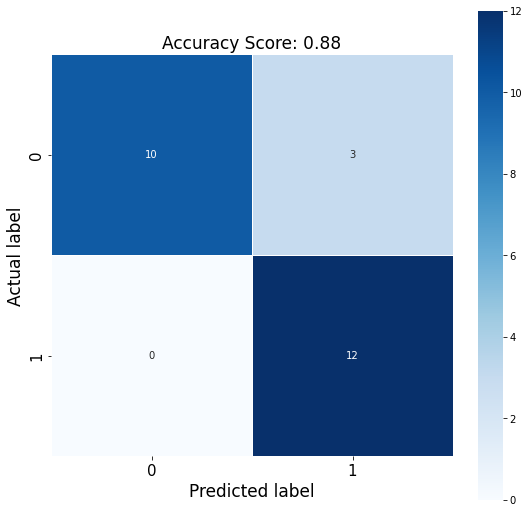

In [88]:
cm = metrics.confusion_matrix(y_test, model.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

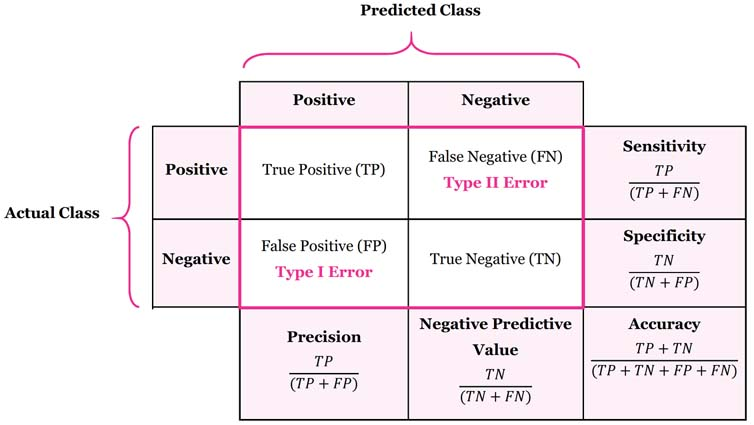

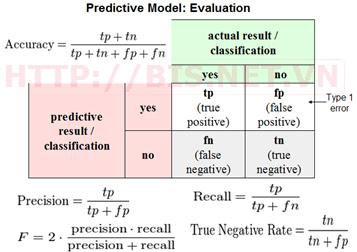

Let's look at the same information in a table in a clearer way. 

In [89]:
# ignore this code

modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        

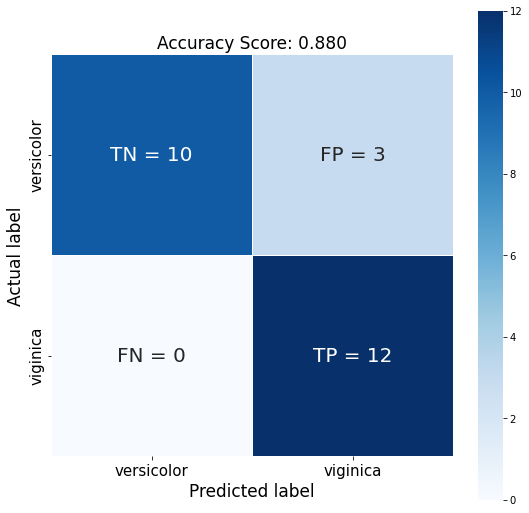

In [90]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['versicolor', 'viginica'],
            yticklabels = ['versicolor', 'viginica'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {:.3f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

So that's it, I encourage you to try and create a logistic regression model of your own. 

In [91]:
metrics.balanced_accuracy_score(y_test, model.predict(X_test))

0.8846153846153846

In [92]:
metrics.f1_score(y_test, model.predict(X_test))

0.888888888888889

In [93]:
metrics.roc_auc_score(y_test, model.predict(X_test))

0.8846153846153846

In [96]:
print(metrics.classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.80      1.00      0.89        12

    accuracy                           0.88        25
   macro avg       0.90      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25

